In [1]:
# Dataset Identification and Exploratory Analysis

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# load the dataset
df = pd.read_csv("data/ClassicHit.csv")


In [9]:
# Preview the first few rows of the dataset
df.head()

Track          Artist  Year  Duration  Time_Signature  \
0         Hey Jack Kerouac  10,000 Maniacs  1987    206413               4   
1         Like the Weather  10,000 Maniacs  1987    236653               4   
2  What's the Matter Here?  10,000 Maniacs  1987    291173               4   
3               Trouble Me  10,000 Maniacs  1989    193560               4   
4    Candy Everybody Wants  10,000 Maniacs  1992    185960               4   

   Danceability  Energy  Key  Loudness  Mode  Speechiness  Acousticness  \
0         0.616   0.511    6   -15.894     1       0.0279       0.03840   
1         0.770   0.459    1   -17.453     1       0.0416       0.11200   
2         0.593   0.816    9    -7.293     1       0.0410       0.00449   
3         0.861   0.385    2   -10.057     1       0.0341       0.15400   
4         0.622   0.876   10    -6.310     1       0.0305       0.01930   

   Instrumentalness  Liveness  Valence    Tempo  Popularity      Genre  
0          0.000000    0.1500    0.604  132.015          40  Alt. Rock  
1          0.003430    0.1450    0.963  133.351          43  Alt. Rock  
2          0.000032    0.0896    0.519   99.978          12  Alt. Rock  
3          0.000000    0.1230    0.494  117.913          47  Alt. Rock  
4          0.006840    0.0987    0.867  104.970          43  Alt. Rock

## Dataset Description

The dataset contains 15,150 music tracks from 3,083 artists, spanning from 1923 to 2023. Each track includes various audio features provided by Spotify and is classified into one of 19 genres. The features include:

- **Track**: Title of the song.
- **Artist**: Name of the artist or band.
- **Year**: Release year of the track.
- **Duration**: Length of the track in milliseconds.
- **Time_Signature**: Musical time signature (e.g., 4/4).
- **Danceability**: Suitability for dancing (0.0 to 1.0).
- **Energy**: Intensity and activity (0.0 to 1.0).
- **Key**: Key the track is in (0=C).
- **Loudness**: Overall loudness in decibels (dB).
- **Mode**: Modality (0 = Minor, 1 = Major).
- **Speechiness**: Presence of spoken words (0.0 to 1.0).
- **Acousticness**: How acoustic the track is (0.0 to 1.0).
- **Instrumentalness**: Likelihood the track is instrumental (0.0 to 1.0).
- **Liveness**: Presence of a live audience (0.0 to 1.0).
- **Valence**: Musical positiveness (0.0 to 1.0).
- **Tempo**: Beats per minute (BPM).
- **Popularity**: Track's popularity (0 to 100).
- **Genre**: Genre label (19 unique genres).


In [10]:
# Check the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 15150 rows and 18 columns.


In [11]:
# Check for missing values
df.isnull().sum()

Track               0
Artist              0
Year                0
Duration            0
Time_Signature      0
Danceability        0
Energy              0
Key                 0
Loudness            0
Mode                0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Popularity          0
Genre               0
dtype: int64

In [12]:
# Check for duplicate entries
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1


In [13]:
# Drop duplicate rows if any
df = df.drop_duplicates()

In [14]:
# Verify data types of each column
df.dtypes

Track                object
Artist               object
Year                  int64
Duration              int64
Time_Signature        int64
Danceability        float64
Energy              float64
Key                   int64
Loudness            float64
Mode                  int64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Popularity            int64
Genre                object
dtype: object

## Basic Statistics of Numerical Features

In [15]:
# Statistical summary of numerical columns
df.describe().T

count           mean            std           min  \
Year              15149.0    1984.707505      19.481110   1899.000000   
Duration          15149.0  241305.077431  105799.760344  23000.000000   
Time_Signature    15149.0       3.921711       0.348253      0.000000   
Danceability      15149.0       0.574671       0.166213      0.000000   
Energy            15149.0       0.617683       0.239533      0.000098   
Key               15149.0       5.257707       3.569817      0.000000   
Loudness          15149.0      -9.154811       4.289575    -47.359000   
Mode              15149.0       0.696614       0.459736      0.000000   
Speechiness       15149.0       0.075793       0.077706      0.000000   
Acousticness      15149.0       0.302632       0.317796      0.000001   
Instrumentalness  15149.0       0.091052       0.229081      0.000000   
Liveness          15149.0       0.200071       0.175199      0.012400   
Valence           15149.0       0.571153       0.250976      0.000000   
Tempo             15149.0     120.666212      29.180888      0.000000   
Popularity        15149.0      43.024490      20.788090      0.000000   

                          25%            50%          75%          max  
Year                1971.0000    1983.000000    1998.0000     2024.000  
Duration          180360.0000  222865.000000  275173.0000  3060650.000  
Time_Signature         4.0000       4.000000       4.0000        5.000  
Danceability           0.4610       0.582000       0.6960        0.988  
Energy                 0.4420       0.644000       0.8190        0.999  
Key                    2.0000       5.000000       8.0000       11.000  
Loudness             -11.7370      -8.481000      -5.9570        0.919  
Mode                   0.0000       1.000000       1.0000        1.000  
Speechiness            0.0343       0.046400       0.0784        0.950  
Acousticness           0.0242       0.167000       0.5570        0.996  
Instrumentalness       0.0000       0.000084       0.0124        0.987  
Liveness               0.0919       0.130000       0.2570        0.996  
Valence                0.3710       0.586000       0.7820        0.989  
Tempo                 98.7310     118.777000     138.0750      219.973  
Popularity            28.0000      44.000000      59.0000       98.000

## Distribution of Genres

C:\Users\tflar\AppData\Local\Temp\ipykernel_27352\4008365153.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


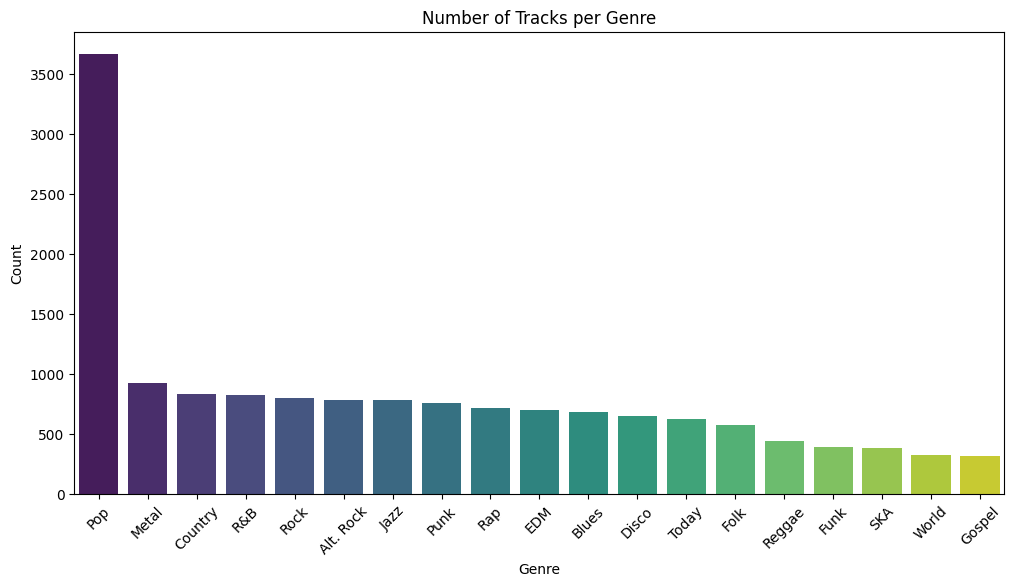

In [16]:
# Count of tracks per genre
genre_counts = df["Genre"].value_counts()

# Plot the distribution of genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title("Number of Tracks per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



**Observations:** The bar chart reveals significant class imbalance within the dataset. For instance, the "Pop" genre has a disproportionately large number of tracks compared to other genres, while genres like "World" and "Gospel" have notably fewer tracks. This imbalance could pose challenges for machine learning models, as they may become biased towards the majority class, leading to poor predictive performance on underrepresented genres. Addressing this imbalance, potentially through techniques such as class weighting, oversampling, or undersampling, will be critical during model training to ensure fair and accurate genre predictions.


## Correlation Matrix of Audio Features


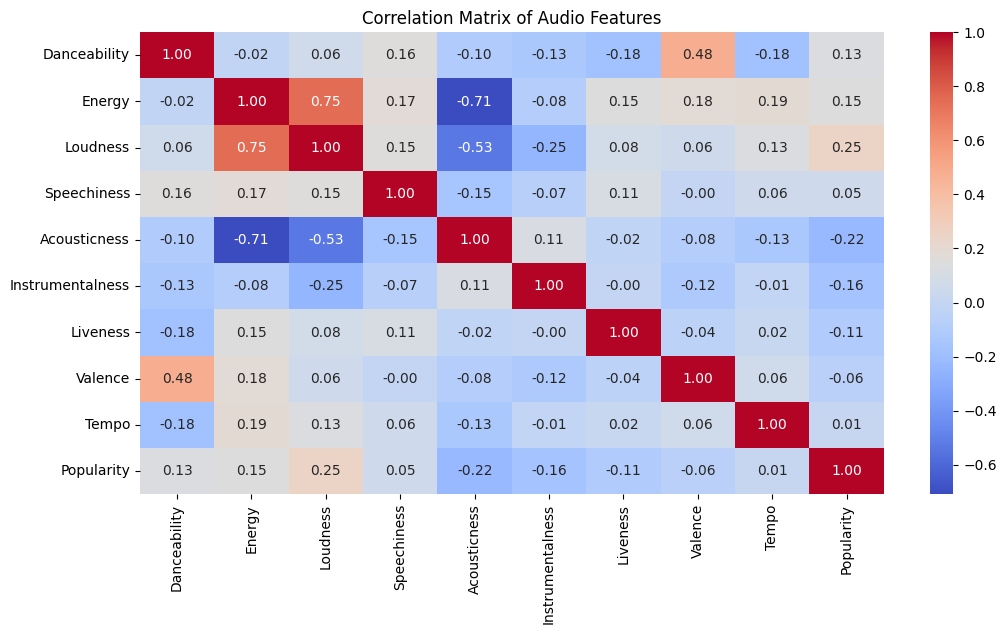

In [17]:
# Select numerical audio features for correlation
audio_features = [
    "Danceability",
    "Energy",
    "Loudness",
    "Speechiness",
    "Acousticness",
    "Instrumentalness",
    "Liveness",
    "Valence",
    "Tempo",
    "Popularity",
]

# Compute the correlation matrix
corr_matrix = df[audio_features].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Audio Features")
plt.show()

**Observations:** The correlation matrix highlights some significant relationships between audio features:

1. **High Correlation Between Energy and Loudness (0.75):**
    * This strong positive correlation suggests that tracks with higher energy levels tend to also have higher loudness levels. Including both features in the model may introduce multicollinearity, potentially complicating model interpretation.
2. **Negative Correlation Between Acousticness and Energy (-0.71):**
    * Tracks with higher acousticness tend to have lower energy, indicating a clear distinction between acoustic and high-energy tracks. This relationship may provide valuable predictive power.
3. **Moderate Correlation Between Danceability and Valerance (0.48):**
    * Tracks that are more danceable also tend to have a positive and uplifting sound, as indicated by the moderate correlation between danceability and valence.
4. **Other Notable Correlations:**
    * Loudness and Cousticness (-0.53): Loud tracks tend to have lower acousticness.
    * Popularity and Looudness (0.25): Popular tracks tend to have higher loudness, though the relationship is relatively weak.

## Distribution of Audio Features

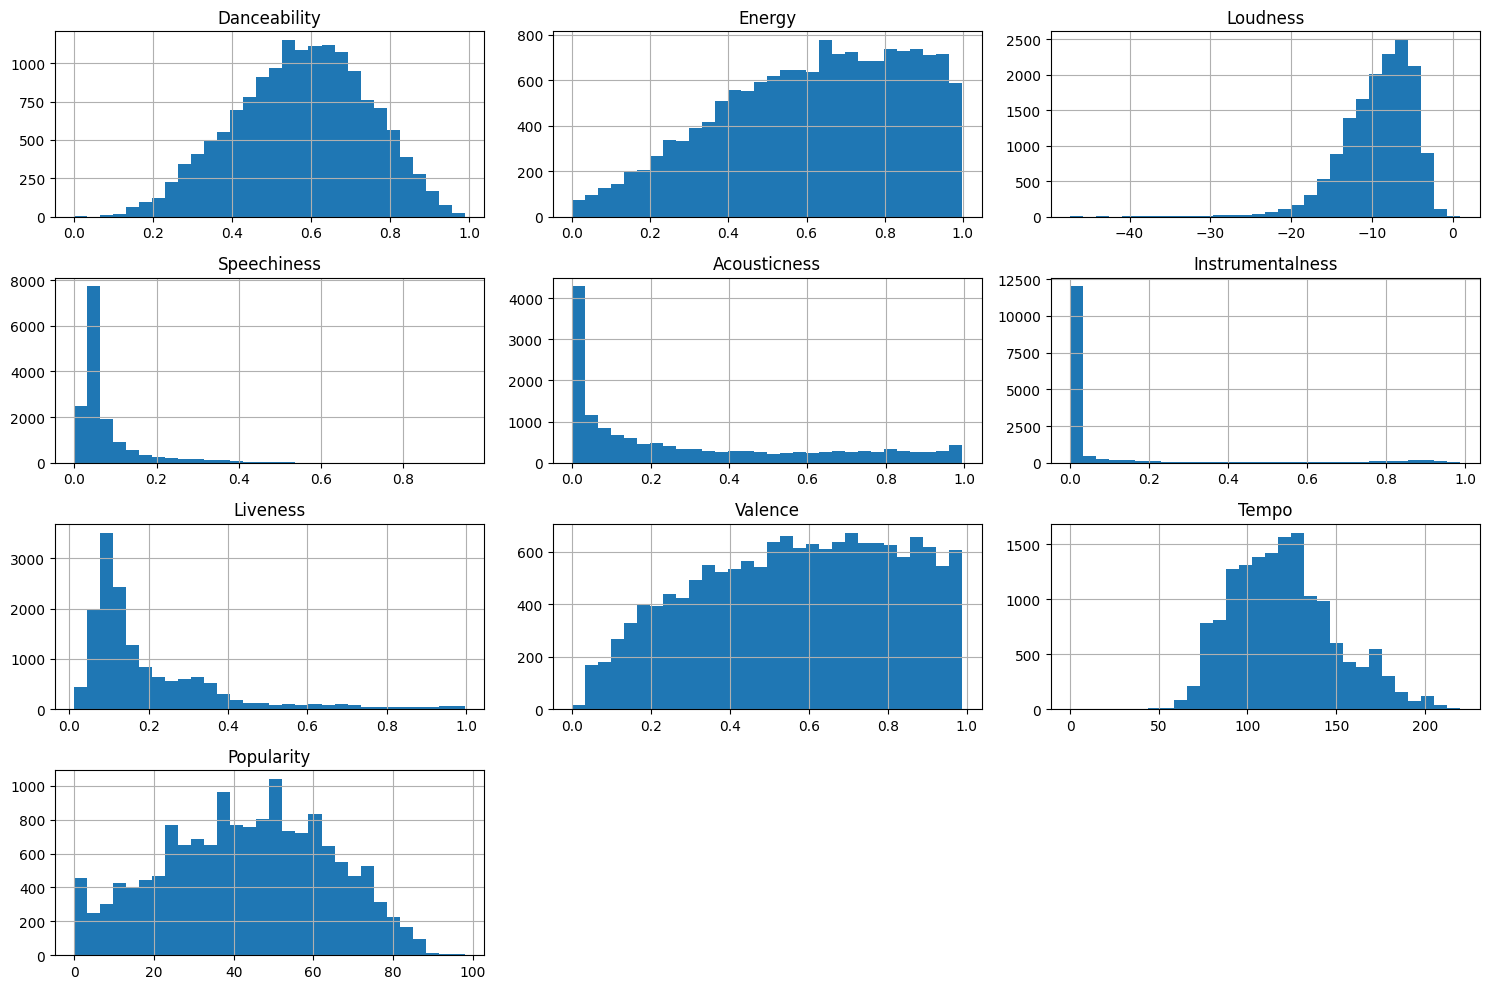

In [18]:
# Plot histograms for each audio feature
df[audio_features].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

**Observations:** 
1. **Danceability:**
    * Distribution: Approximately normal, with a slight skew toward higher values.
    * Implication: No immediate need for transformation, but scaling (e.g., normalization or standardization) may be useful for modeling.
2. **Energy:**
    * Distribution: Skewed slightly toward higher values (0.6–1.0 range).
    * Implication: May require scaling but likely does not need transformation as the skew is minimal.
3. **Loudness:**
    * Distribution: Strongly left-skewed (most values between -20 and 0).
    * Implication: May require normalization or logarithmic transformation to reduce skewness.
4. **Speechiness:**
    * Distribution: Highly right-skewed (most values near 0.0).
    * Implication: A log or square root transformation could help reduce the skew for better model performance.
5. **Acousticness:**
    * Distribution: Strong right-skew (most values near 0.0).
    * Implication: Similar to Speechiness, consider a log or square root transformation to normalize the distribution.
6. **Instrumentalness:**
    * Distribution: Extremely right-skewed (many values near 0.0, few near 1.0).
    * Implication: A log transformation may help normalize the distribution, though the feature may also work well as-is for binary-like behavior.
7. **Liveness:**
    * Distribution: Strong right-skew (majority below 0.2).
    * Implication: Consider scaling or transformation to reduce skewness for improved modeling.
8. **Valence:**
    * Distribution: Fairly uniform with a slight concentration in the mid-range (0.4–0.6).
    * Implication: No transformation necessary, but scaling may be applied for consistency with other features.
9. **Tempo:**
    * Distribution: Approximately normal, centered around 100–150 BPM.
    * Implication: No transformation needed, but standardization could improve model performance.
10. **Popularity:**
    * Distribution: Approximately normal, centered around 30–60.
    * Implication: No immediate need for transformation.

## Boxplots of Audio Features by Genre

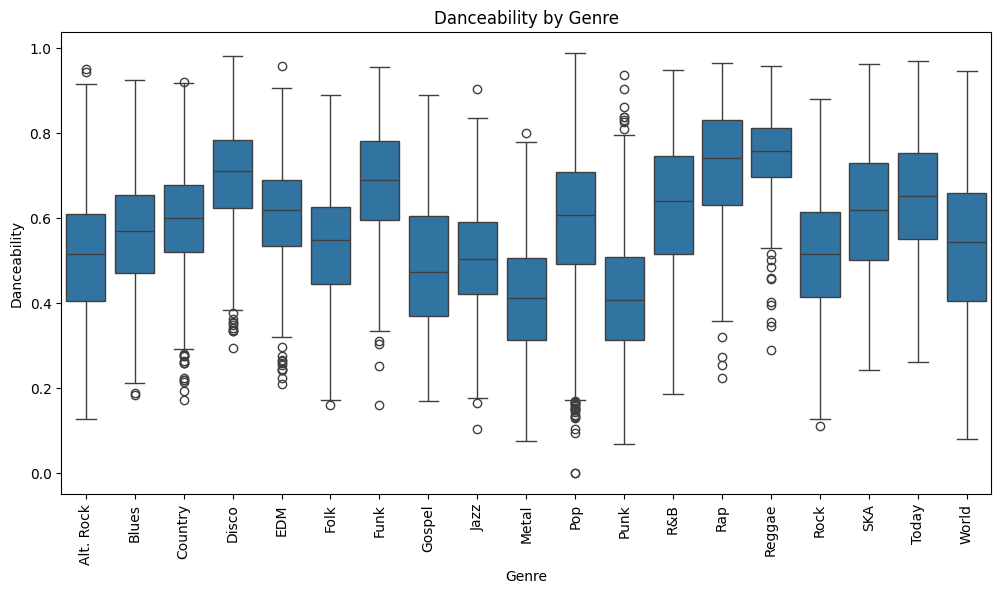

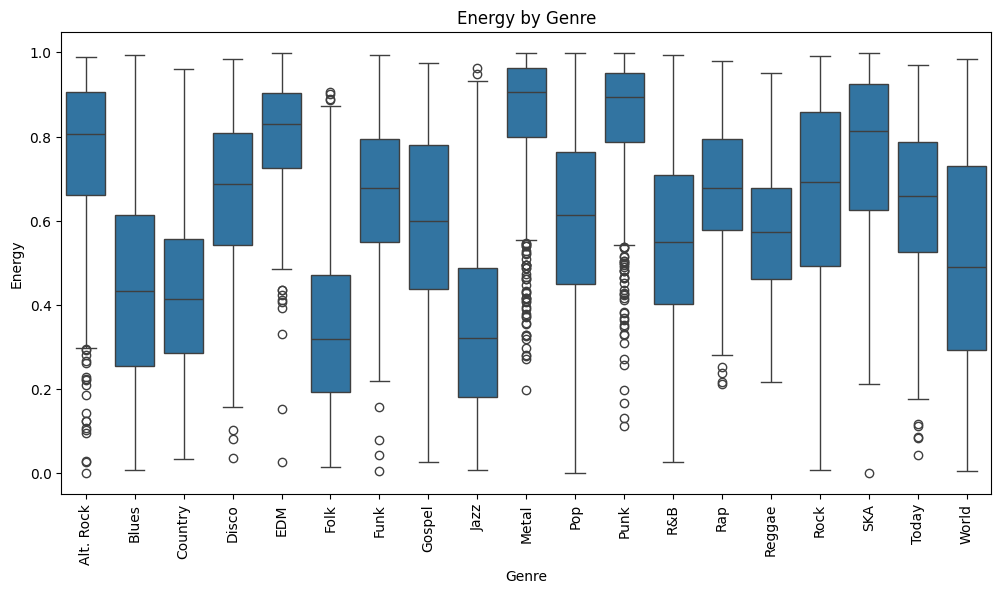

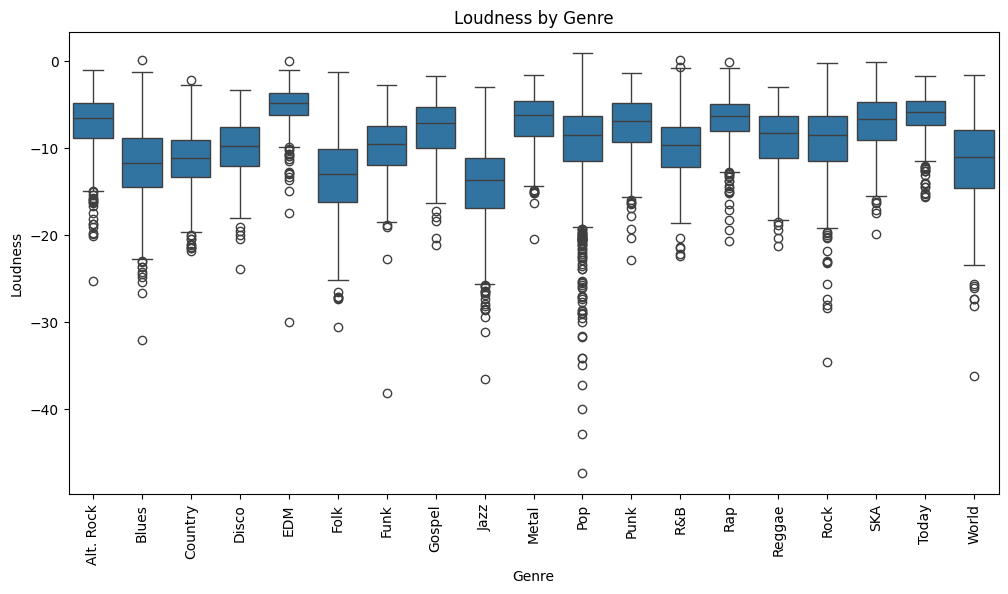

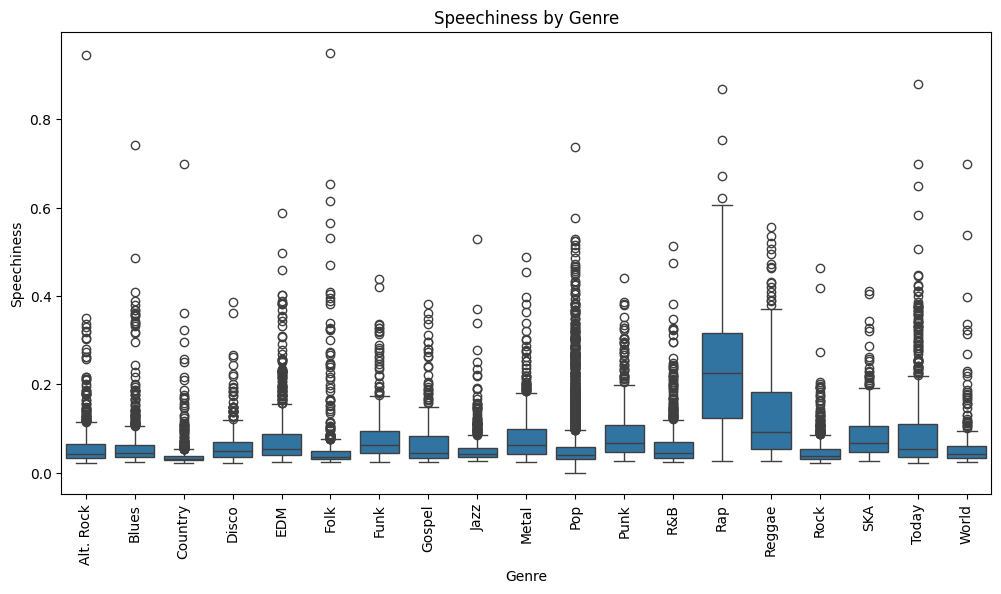

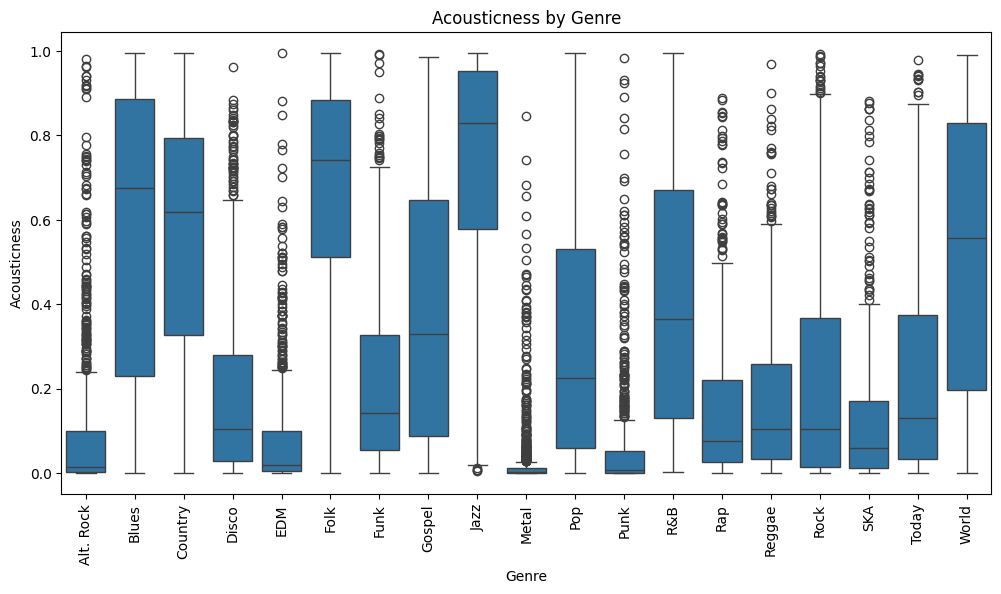

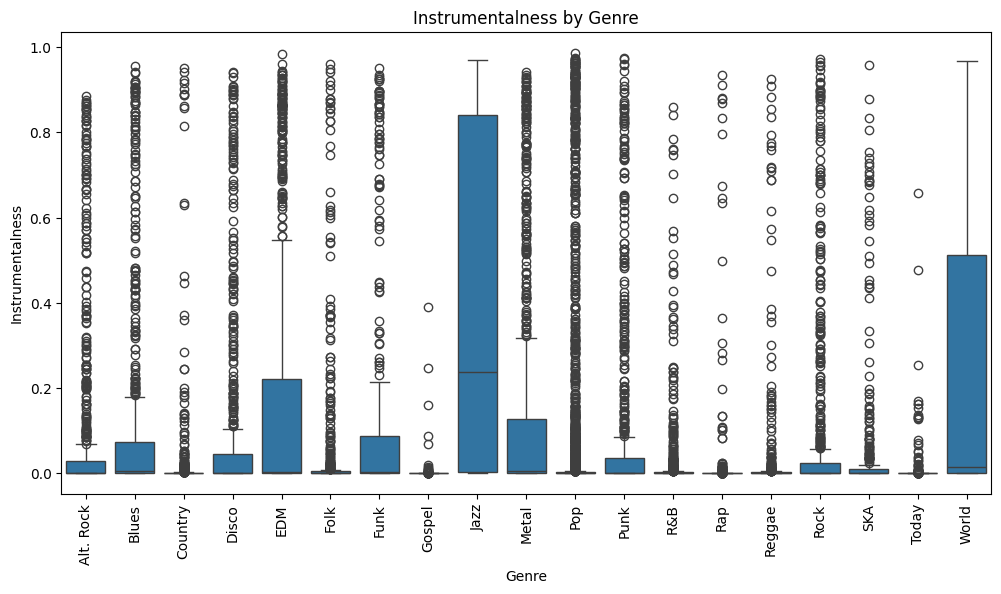

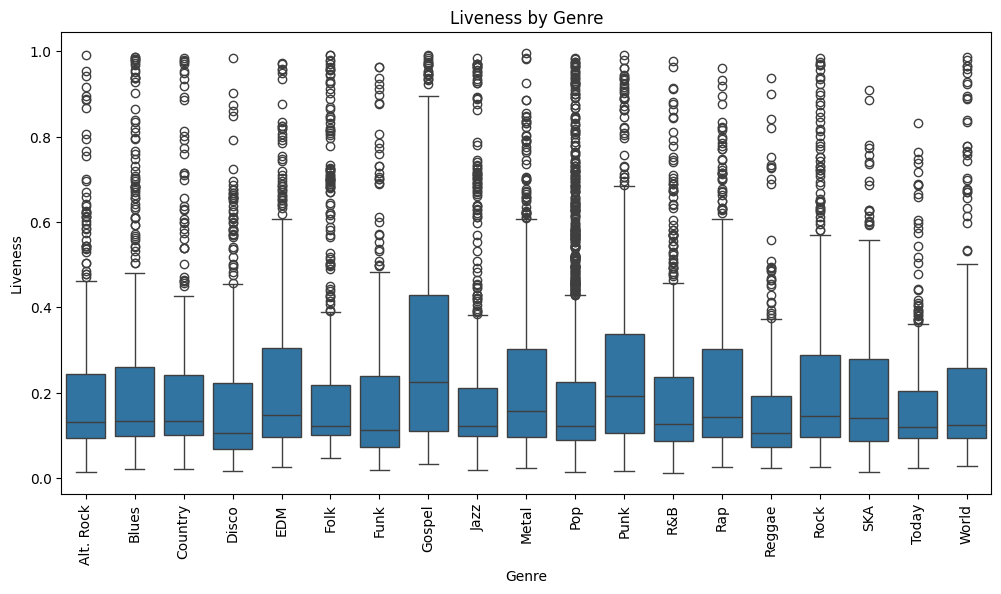

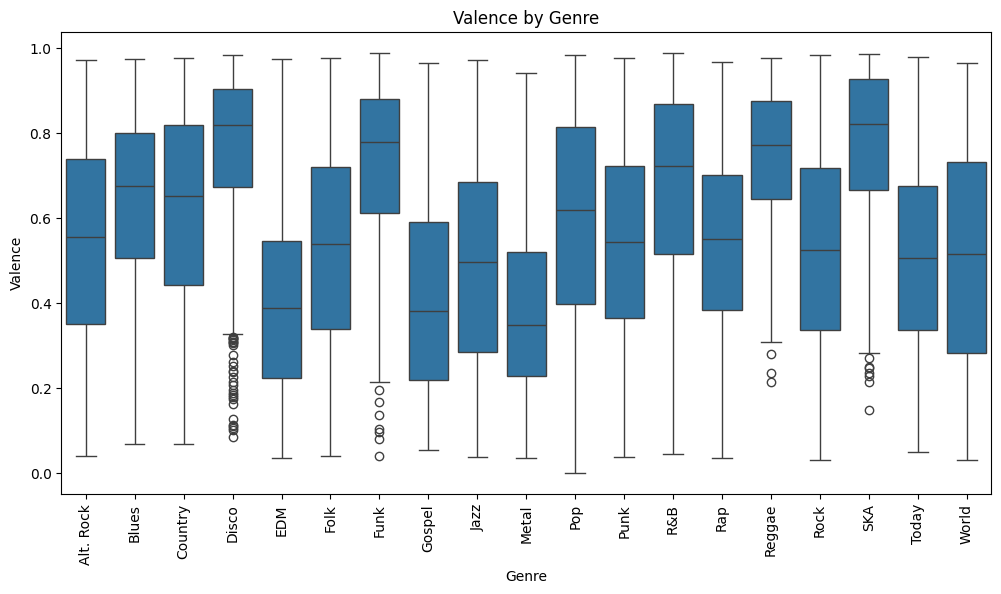

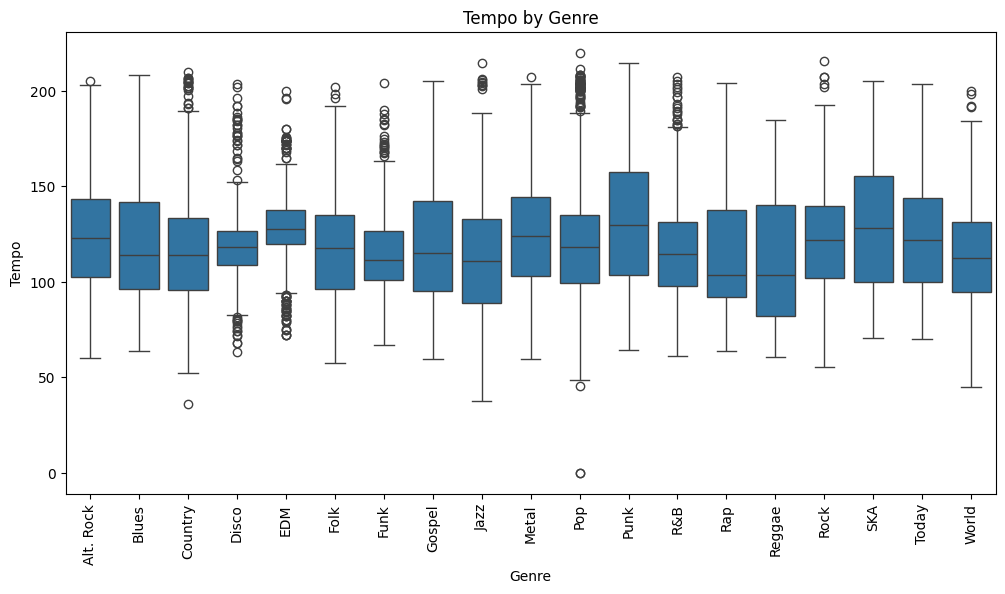

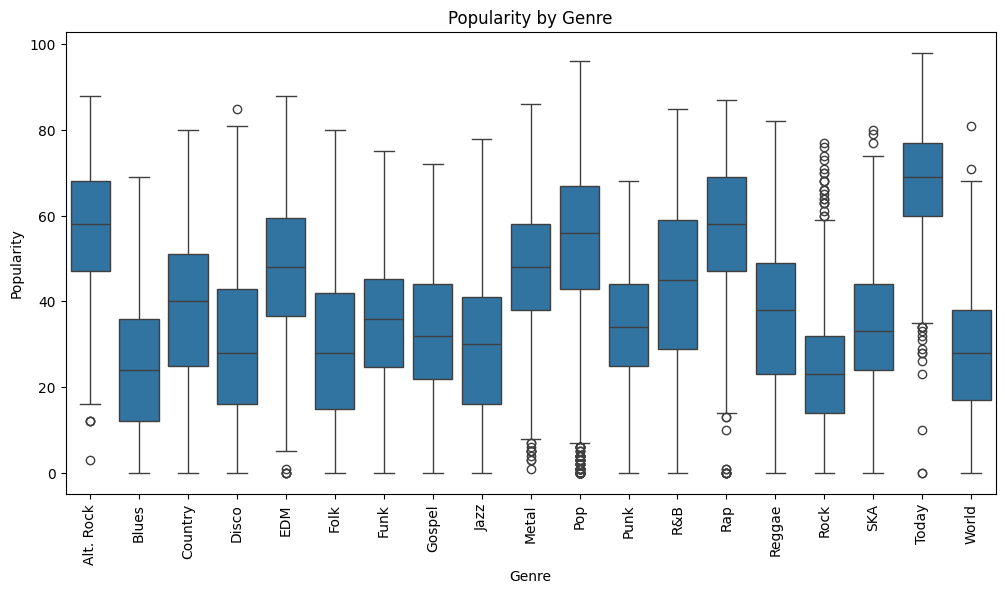

In [19]:
# Define a function to plot boxplots of features by genre
def plot_feature_by_genre(feature):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Genre", y=feature, data=df)
    plt.title(f"{feature} by Genre")
    plt.xlabel("Genre")
    plt.ylabel(feature)
    plt.xticks(rotation=90)
    plt.show()


# Plot boxplots for each audio feature
for feature in audio_features:
    plot_feature_by_genre(feature)

**Observations:**
1. **Danceability by Genre:**
    * Genres like EDM, Disco, and Pop have higher median danceability, indicating these genres are more suited for dancing.
    * Genres such as Jazz and Metal tend to have lower danceability.
    * Variations within genres suggest danceability could be an important predictor of genre, especially for dance-focused genres.
2. **Energy by Genre:**
    * Metal, Punk, and EDM exhibit higher median energy levels, indicating intense and active tracks.
    * Acoustic genres like Folk and Gospel show lower energy values.
    * Energy levels show clear differentiation across genres, making it a key distinguishing feature.
3. **Loudness by Genre:**
    * Genres like Metal and EDM have high loudness levels, while Folk and Jazz have lower loudness.
    * Loudness follows a similar pattern to energy as observed in earlier analysis.
4. **Speechiness by Genre:**
    * Rap has a significantly higher median speechiness, aligning with its spoken-word characteristics.
    * Most other genres have low speechiness, with few outliers.
    * Speechiness is likely a strong feature for separating genres like Rap from others.
5. **Acousticness by Genre:**
    * Acoustic genres like Folk and Jazz have higher acousticness values, while EDM and Metal show minimal acousticness.
    * The range of acousticness within genres like Folk and Blues suggests variability in instrumentation.
6. **Instrumentalness by Genre:**
    * Jazz and World music exhibit high levels of instrumentalness, with many tracks having minimal vocals.
    * Pop and Rap tend to have very low instrumentalness.
    * This feature is crucial for distinguishing instrumental-dominated genres.
7. **Liveness by Genre:**
    * Gospel and World music show higher liveness, reflecting live performance settings.
    * Most other genres have low liveness values, making this feature useful for distinguishing genres with a strong live component.
8. **Valence by Genre:**
    * Funk, Disco, and Pop show higher valence, indicating positive and uplifting moods.
    * Genres like Metal and Blues have lower valence, reflecting darker or more somber tones.
    * Valence provides insight into the mood and emotional tone of genres.
9. **Tempo by Genre:**
    * Tempo varies significantly within most genres, but genres like Disco and EDM tend to have higher and consistent tempo ranges.
    * Slower tempos are observed in genres like Jazz and Folk.
10. **Popularity by Genre:**
    * Pop exhibits the highest median popularity, which is expected due to its mainstream appeal.
    * Other genres like Blues and Folk show lower popularity on average.

**Summary:**
These boxplots reveal distinct patterns in audio features across genres, highlighting their utility in genre classification. Features like **speechiness**, **acousticness**, **energy**, and **instrumentalness** show strong genre-specific tendencies, making them valuable for predictive modeling. However, features such as **tempo** and **liveness**, which show broader variability across genres, may require additional context or interaction terms to enhance their predictive power.

## Temporal Analysis: Tracks Over the Years

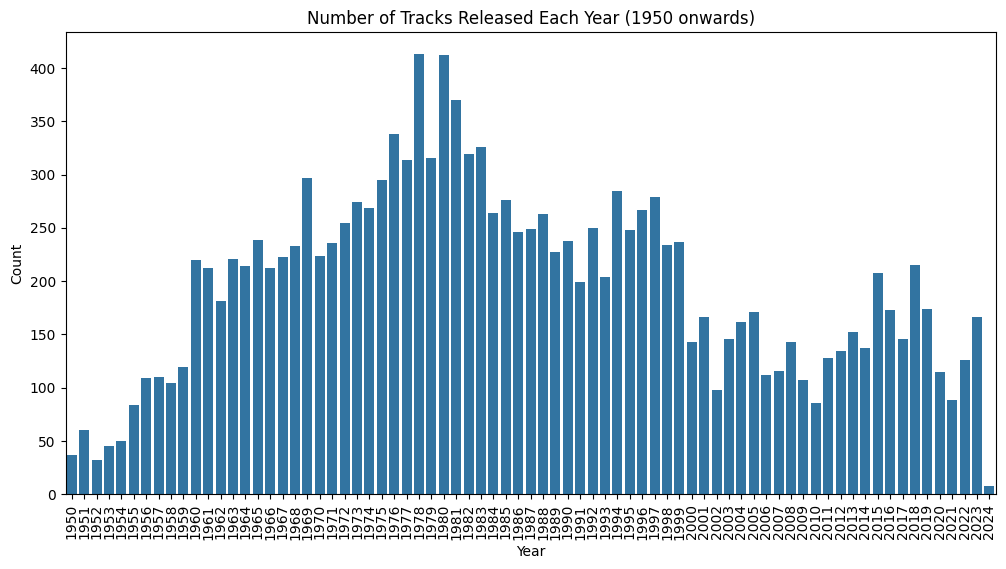

In [20]:
# Plot the number of tracks released each year
plt.figure(figsize=(12, 6))
sns.countplot(
    x="Year", data=df[df["Year"] >= 1950]
)  # Filtering years for better visibility
plt.title("Number of Tracks Released Each Year (1950 onwards)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

**Observations:**
1. **Peak Release Periods:**
    * The number of tracks released increased steadily from the 1950s, reaching a peak during the 1970s and 1980s. This aligns with the rise of popular music and advancements in music recording and distribution technologies during that era.
2. **Decline in the 1990s and Early 2000s:**
    * A noticeable decline in track counts is observed in the 1990s and early 2000s. This could reflect changes in music collection efforts, genre shifts, or data availability during these periods.
3. **Resurgence in Recent Years:**
    * Starting from the 2010s, there is a renewed increase in the number of tracks, possibly due to the rise of digital music platforms and streaming services like Spotify.
4. **Temporal Bias:**
    * The dataset may exhibit temporal bias, as earlier decades (pre-1950s) and recent years (post-2020) are underrepresented. This may impact the generalizability of models trained on this dataset, especially for predicting older or newer music trends.
5. **Potential Impact:**
    * Models might struggle to accurately classify genres for underrepresented time periods due to insufficient data. Temporal features such as the "year of release" may also need to be weighted appropriately to account for this bias.

## Trends of Audio Features Over Time


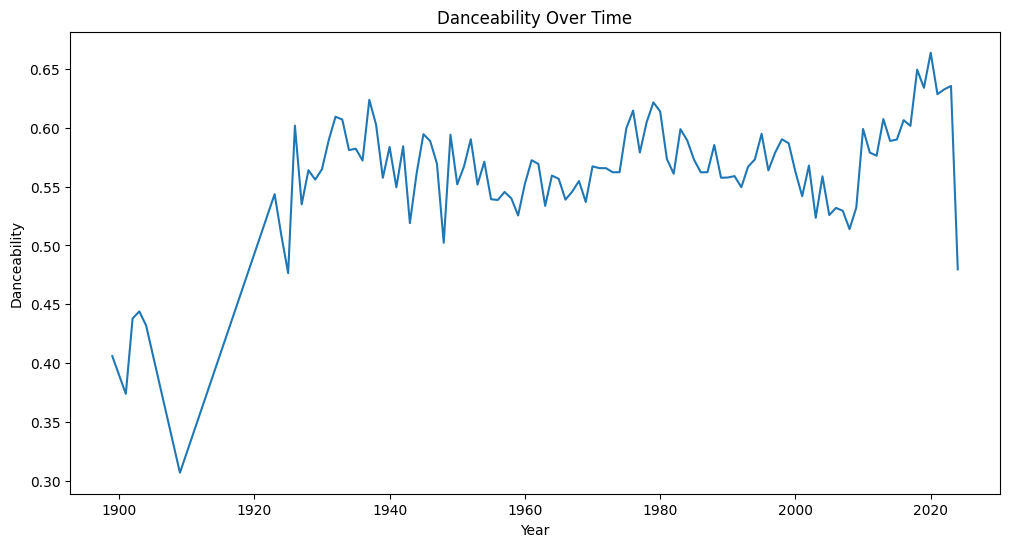

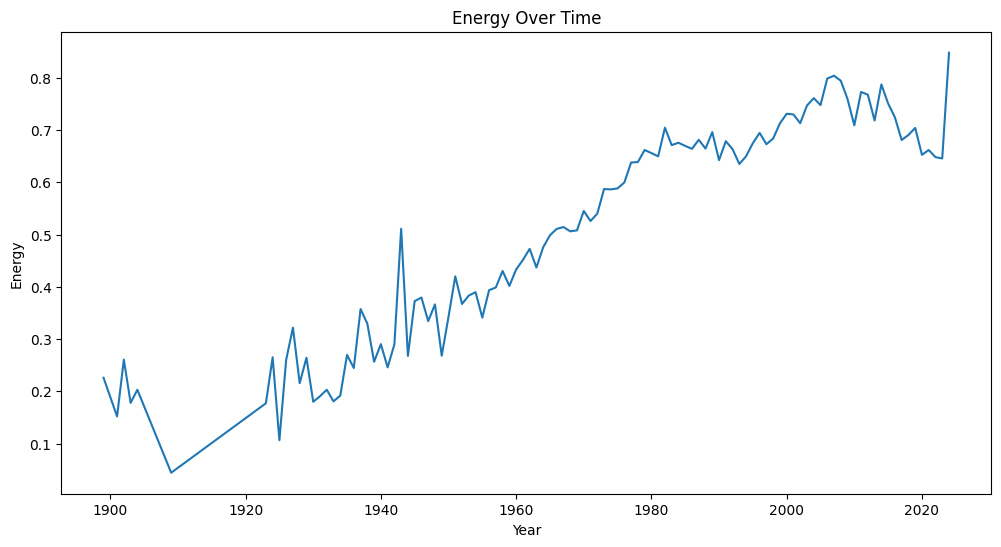

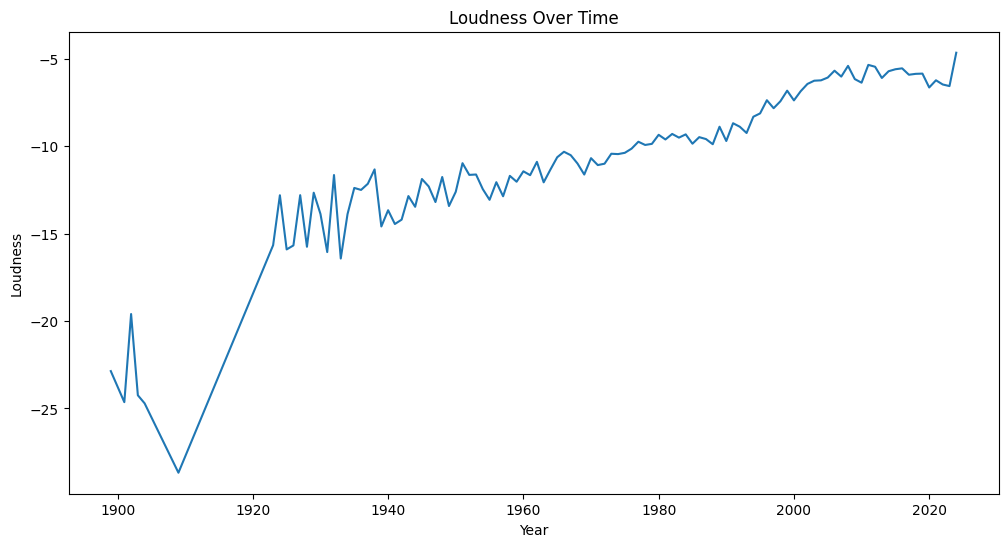

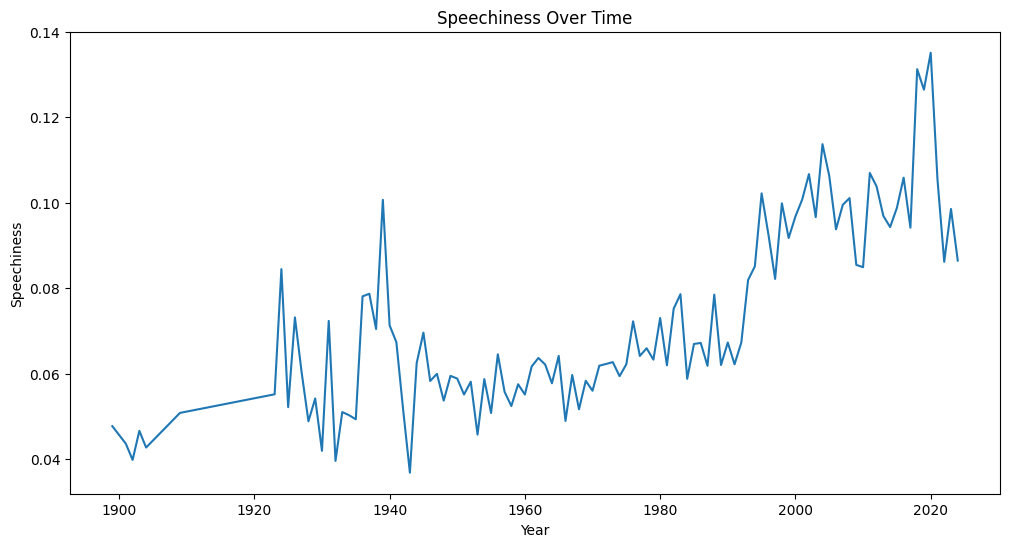

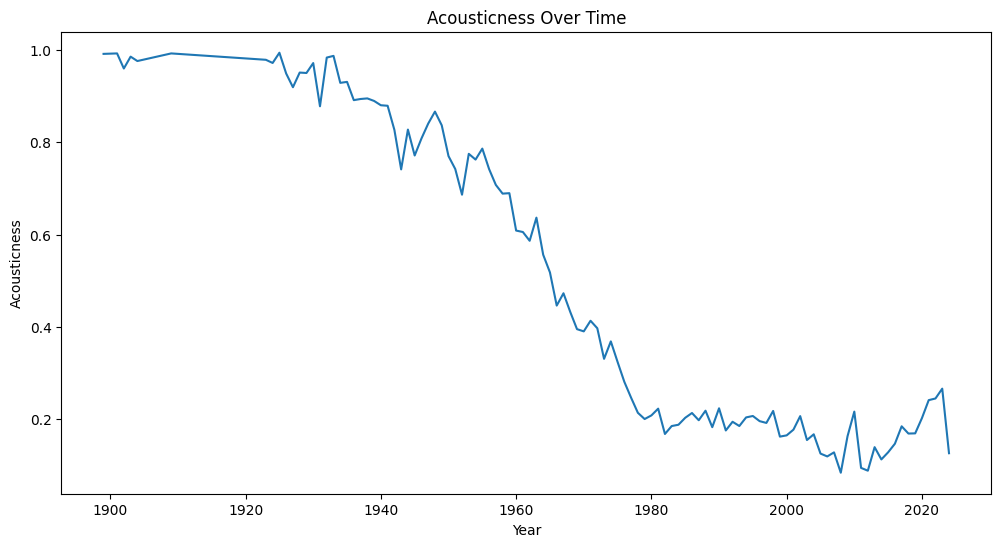

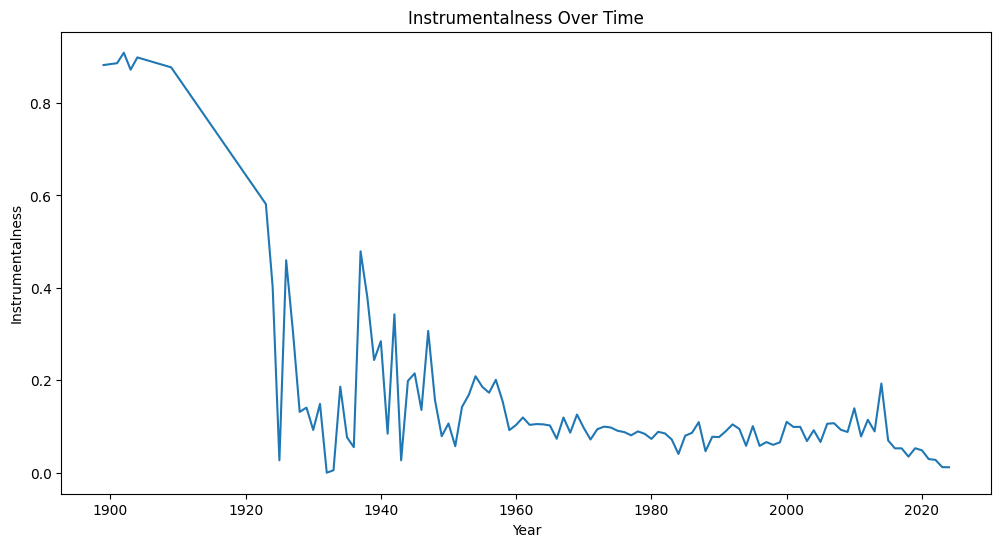

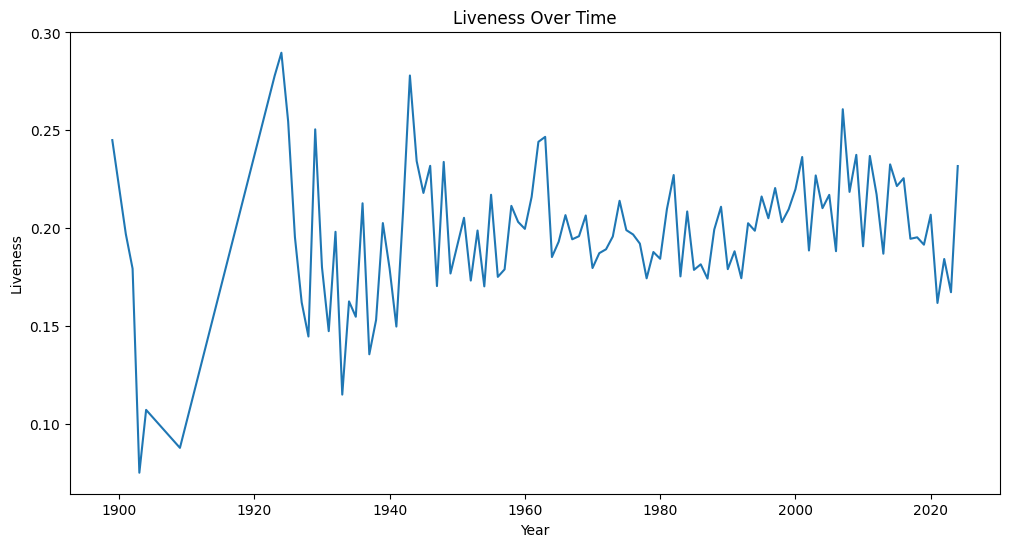

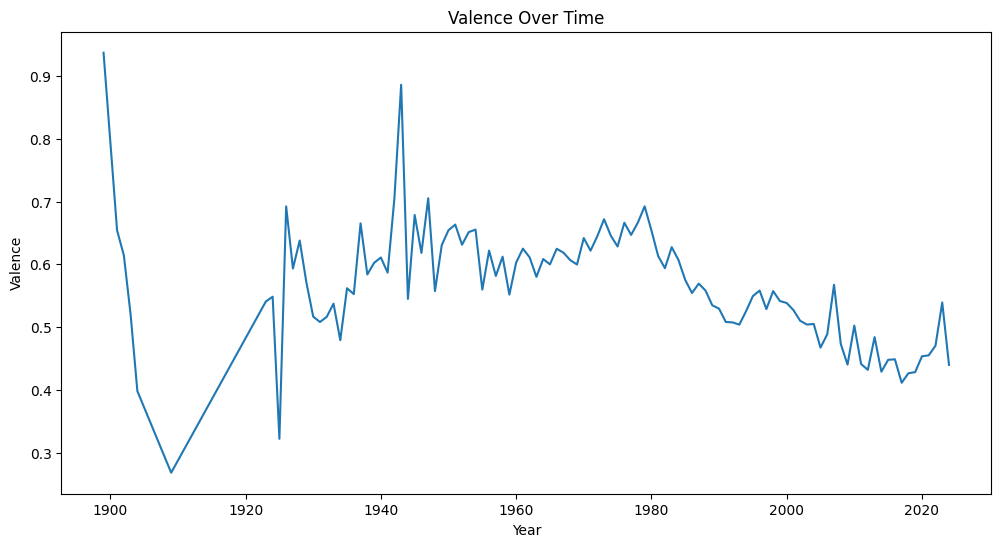

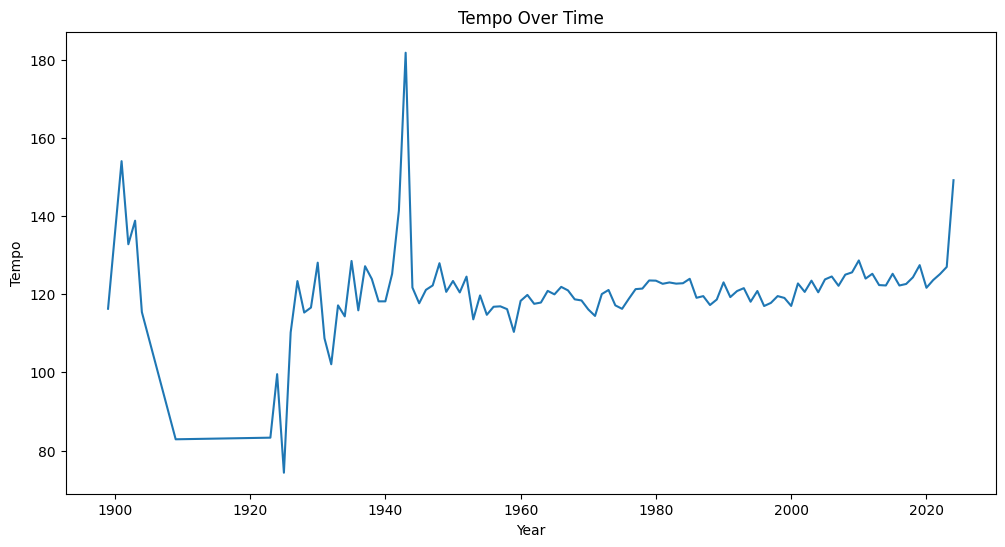

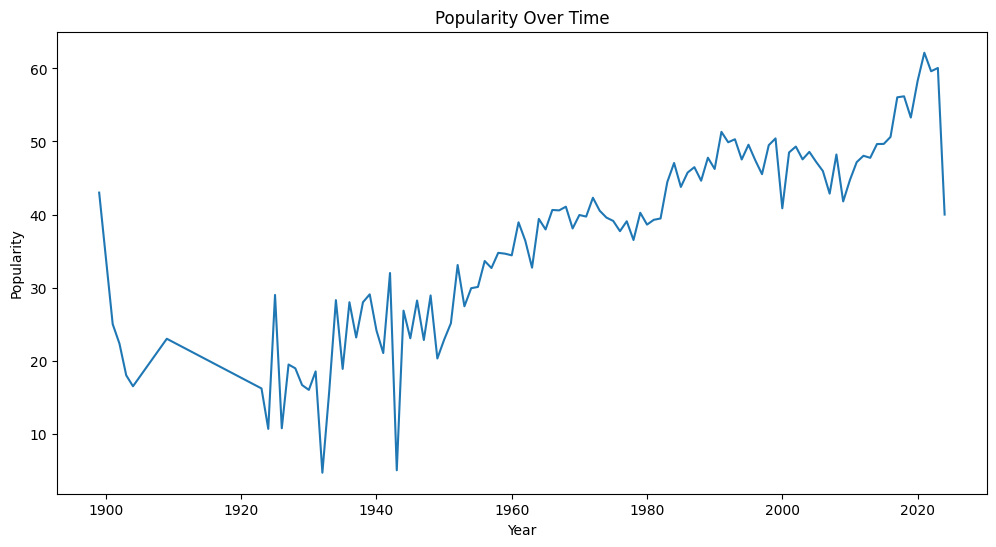

In [22]:
# Group by year and calculate the mean of each audio feature
yearly_means = df.groupby("Year")[audio_features].mean()

# Plot each audio feature over time
for feature in audio_features:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x="Year", y=feature, data=yearly_means)
    plt.title(f"{feature} Over Time")
    plt.xlabel("Year")
    plt.ylabel(feature)
    plt.show()


**Observations:**
1. **Danceability Over Time:**
    * Danceability has shown a gradual increase over time, suggesting a shift in the music industry towards more rhythmically engaging tracks.
    * There are some fluctuations in earlier years, but the general trend indicates a rise in preference for danceable music.
2. **Energy Over Time:**
    * A noticeable upward trend in energy levels suggests a move towards more lively and dynamic compositions.
    * This rise could be indicative of changing audience preferences towards energetic music styles.
3. **Loudness Over Time:**
    * Loudness has significantly increased, reflecting advancements in recording technology and mastering techniques.
    * The trend aligns with the "loudness war" era, where higher loudness was used to create more impactful soundscapes.
4. **Speechiness Over Time:**
    * An increasing trend in speechiness highlights a potential rise in spoken word elements or genres like rap over the years.
    * This suggests a diversification in lyrical delivery styles in modern music.
5. **Acousticness Over Time:**
    * Acousticness has seen a steady decline, pointing to a shift away from acoustic instrumentation towards electronic and synthesized sounds.
    * This trend aligns with the rise of digital production techniques.
6. **Instrumentalness Over Time:**
    * Instrumentalness has decreased significantly over the decades, indicating a preference for vocal-driven tracks over purely instrumental compositions.
    * The reduction could also reflect the evolution of popular music genres that emphasize lyrics.
7. **Liveness Over Time:**
    * Liveness, indicative of live audience presence in recordings, has remained relatively stable, with occasional peaks.
    * This consistency suggests a balanced inclusion of studio-produced and live-recorded music across eras.
8. **Valence Over Time:**
    * Valence, representing the mood of music, shows fluctuations but a general decline in positivity over time.
    * This might reflect a shift in thematic or emotional content towards more introspective or melancholic tones.
9. **Tempo Over Time:**
    * The tempo has remained relatively stable with some notable peaks in earlier years, indicating a consistent pacing preference in music.
10. **Popularity Over Time:**
    * Popularity scores show an upward trend, reflecting a possible evolution in how music is consumed and appreciated with modern metrics like streaming and digital rankings influencing perceptions.

These insights demonstrate a clear evolution in music production and audience preferences, shaped by technological advancements and cultural trends. These patterns are crucial for understanding genre differentiation and how music features have adapted to changing times.

## Pairplot of Audio Features


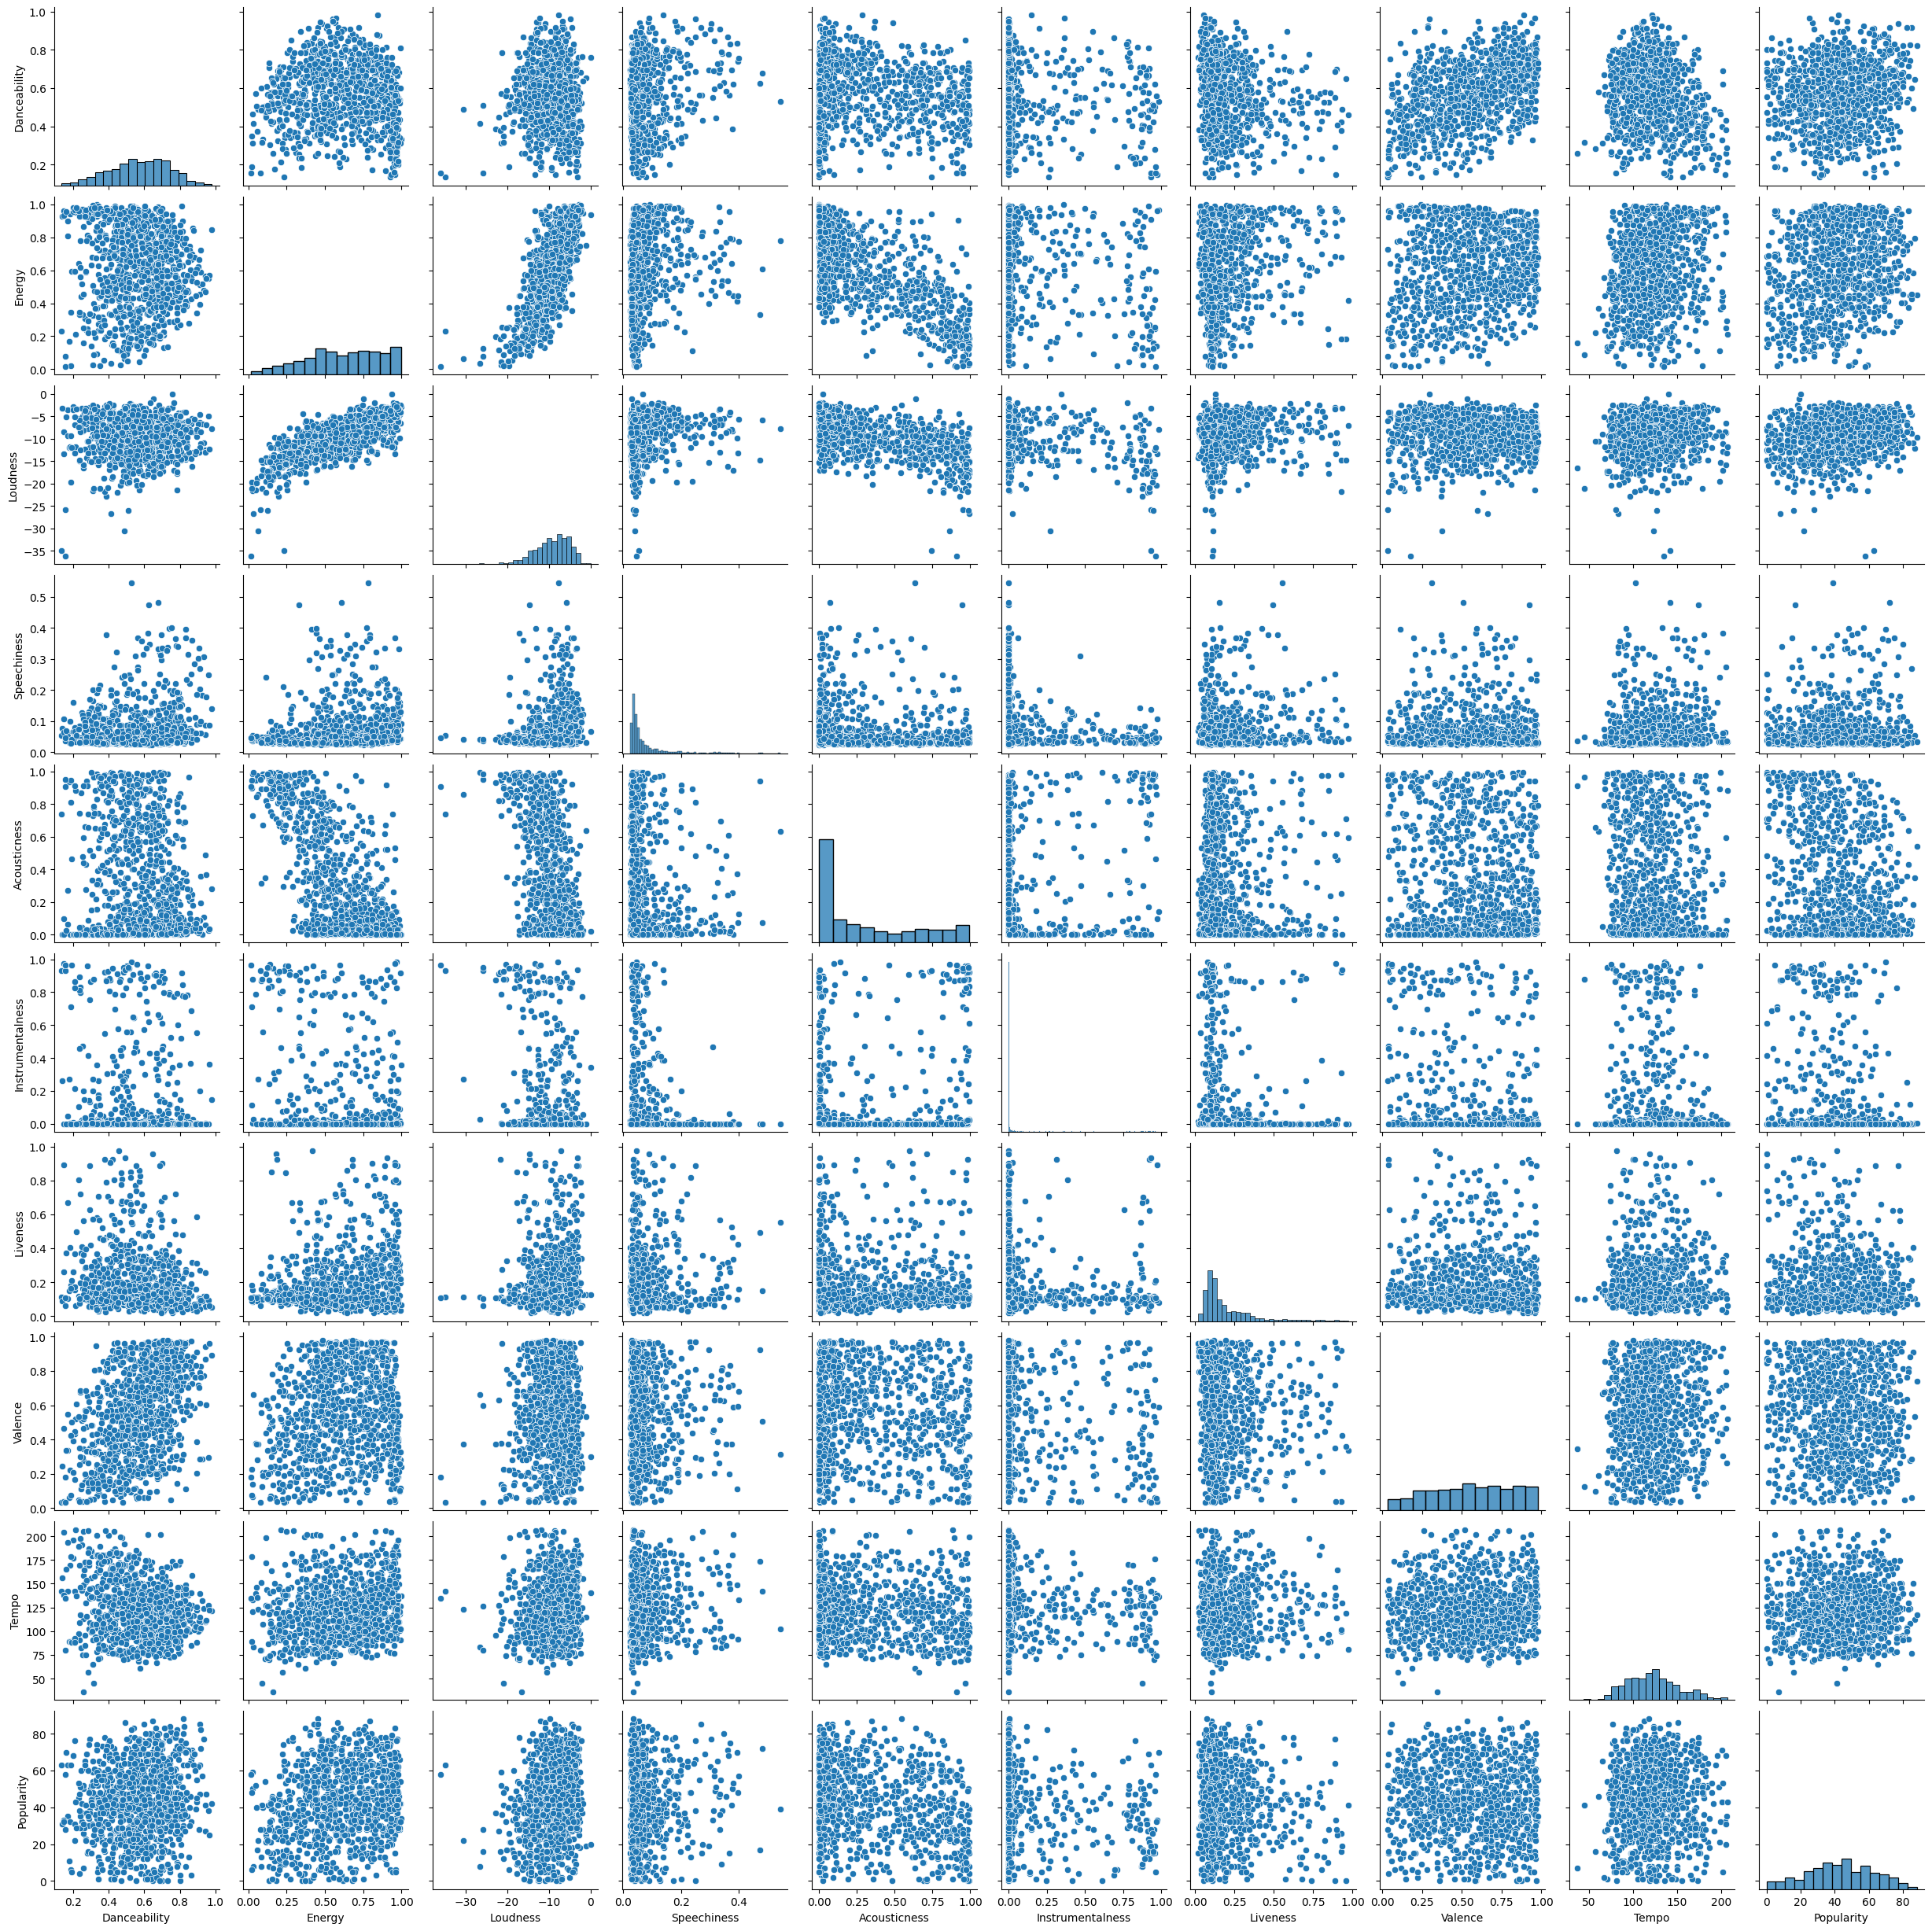

In [24]:
# Sample a subset for pairplot to reduce computation time
sample_df = df.sample(n=1000, random_state=42)

# Plot pairplot
sns.pairplot(sample_df[audio_features])
plt.show()

## Encoding Categorical Variables

- Convert 'Key' and 'Mode' to categorical types.


In [26]:
# Convert 'Key' to categorical
df["Key"] = df["Key"].astype("category")

# Convert 'Mode' to categorical
df["Mode"] = df["Mode"].astype("category")

## Final Dataset After Cleaning

In [27]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 15149 entries, 0 to 15149
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Track             15149 non-null  object  
 1   Artist            15149 non-null  object  
 2   Year              15149 non-null  int64   
 3   Duration          15149 non-null  int64   
 4   Time_Signature    15149 non-null  int64   
 5   Danceability      15149 non-null  float64 
 6   Energy            15149 non-null  float64 
 7   Key               15149 non-null  category
 8   Loudness          15149 non-null  float64 
 9   Mode              15149 non-null  category
 10  Speechiness       15149 non-null  float64 
 11  Acousticness      15149 non-null  float64 
 12  Instrumentalness  15149 non-null  float64 
 13  Liveness          15149 non-null  float64 
 14  Valence           15149 non-null  float64 
 15  Tempo             15149 non-null  float64 
 16  Popularity        15149 non